In [9]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [10]:
#upload csv file
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
#row name change using rename()
df.rename(columns = {'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)
df.head()

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
#check total information
df.shape

(200, 5)

In [13]:
#check missing value in row or column
df.isnull().values.any()

False

In [14]:
#check description 
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


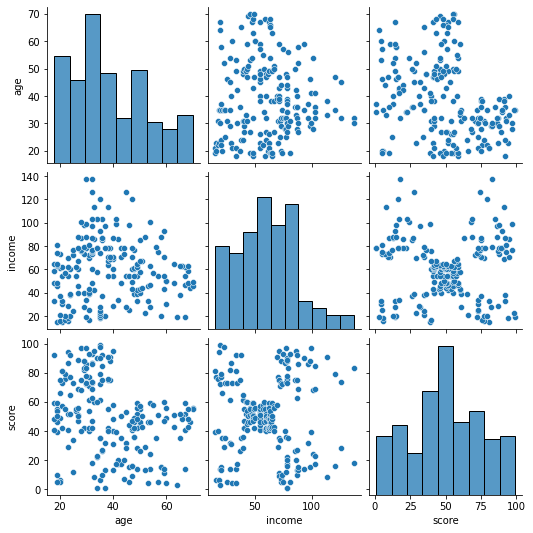

In [15]:
seaborn.pairplot(df[['age', 'income', 'score']])

In [16]:
#import library
import sklearn.cluster as cluster

In [17]:
#create object
kmeans = cluster.KMeans(n_clusters = 5)

In [18]:
kmeans = kmeans.fit(df[['income', 'score']])

In [19]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [20]:
df['income_clusters'] = kmeans.labels_
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [21]:
df['income_clusters'].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

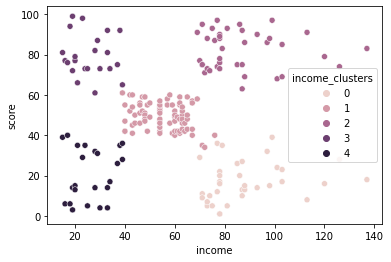

In [22]:
seaborn.scatterplot(x='income', y='score', hue='income_clusters', data=df)

In [46]:
kmeans = cluster.KMeans(n_clusters = 3)

In [47]:
kmeans = kmeans.fit(df[['age', 'score']])

In [48]:
kmeans.cluster_centers_

array([[29.56451613, 80.74193548],
       [42.95744681, 14.59574468],
       [43.05494505, 47.78021978]])

In [49]:
df['age_clusters'] = kmeans.labels_
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,0,1
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,0,1


In [50]:
df['age_clusters'].value_counts()

2    91
0    62
1    47
Name: age_clusters, dtype: int64

<AxesSubplot:xlabel='age', ylabel='score'>

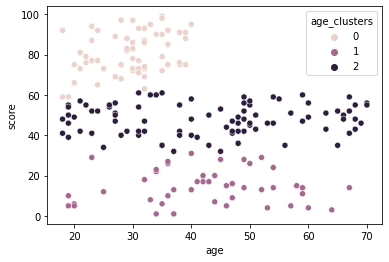

In [51]:
seaborn.scatterplot(x='age', y='score', hue='age_clusters', data=df)

In [52]:
from sklearn.cluster import KMeans

In [53]:
k_range = range(1,12)
wcss = []

In [54]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['income', 'score']])
    wcss.append(km.inertia_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37455.98455516028,
 30259.65720728547,
 25050.832307547527,
 21850.165282585633,
 19669.301557148294,
 17956.50808472795]

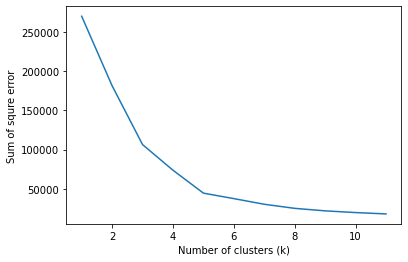

In [56]:
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squre error')
plt.plot(k_range, wcss)

# assignment

In [57]:
from sklearn.cluster import KMeans

In [58]:
k_range = (1,12)
wcss = []

In [59]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['age', 'score']])
    wcss.append(km.inertia_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
wcss

[171535.5, 8708.082595978582]

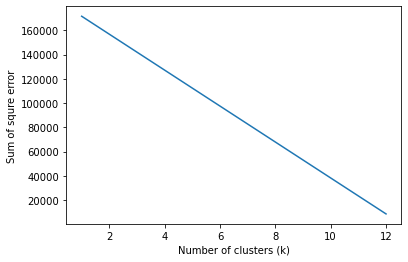

In [61]:
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squre error')
plt.plot(k_range, wcss)